# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
# Importando os dados do Ideb
import pandas as pd
df = pd.read_csv('ideb.csv')
df.head()

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0,2005,AC,1200054,municipal,fundamental,iniciais (1-5),64.1,0.645727,161.8,150.80,3.794003,2.4,NaN
1,1,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
2,2,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
3,3,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
4,4,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN


In [ ]:
# Filtrando as colunas que vamos trabalhar
df_filter = df[['ano','sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
df_filter

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [ ]:
# Verificando o número de linhas e colunas
print(f'O dataframe possui {df_filter.shape[0]} linhas e {df_filter.shape[1]} colunas.')

O dataframe possui 130194 linhas e 6 colunas.


In [ ]:
# Verificando se há dados faltantes
print(f'Existem {df_filter.isnull().sum().sum()} dados faltantes no dataframe.')

Existem 140259 dados faltantes no dataframe.


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


**Resposta:** Neste caso temos um teste unicaudal com as hipóteses nula e alternativa dadas por:

H0:μ=78

Ha:μ≠10

In [ ]:
# Criando um dataframe para trabalhar com o ano de interesse e removendo valores ausentes
df_filter_2005 = df_filter[df_filter['ano'] == 2005]['taxa_aprovacao']

In [ ]:
# Removendo valores ausentes
df_filter_2005 = df_filter_2005.dropna()

In [ ]:
from scipy.stats import ttest_1samp

# Teste da hipótese
ttest_1samp(a=df_filter_2005, popmean=78, alternative='two-sided')

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

**Resposta:** Como o valor de p é menor que 0,05 podemos afirmar com 95% de confiança que a média da taxa de aprovação de 2005 é diferente de 78.

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

**Resposta**
Nesse caso vamos trabalhar com as hipóteses:

H0:Média do IDEB igual para os estados do Rio Grande do Sul e Ceará.

Ha:Média do IDEB é diferente para os estados do Rio Grande do Sul e Ceará.



In [ ]:
from scipy.stats import ttest_ind

# criando um dataframe para trabalhar com o ano de interesse
df_filter_2019 = df_filter[df_filter['ano'] == 2019]

# Removendo as linhas com valores ausentes
df_filter_2019 = df_filter_2019.dropna(subset=['ideb'])

# Calculando o valor t e o p-valor.
ttest_ind(df_filter_2019['ideb'][df_filter_2019['sigla_uf'] == 'RS'],
          df_filter_2019['ideb'][df_filter_2019['sigla_uf'] == 'CE'])


TtestResult(statistic=-4.3200508719663135, pvalue=1.6632800256873896e-05, df=1488.0)

**Resposta:** Como o p-valor é menor que 0.05, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média do IDEB do Rio Grande do Sul e de Ceará não são iguais.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

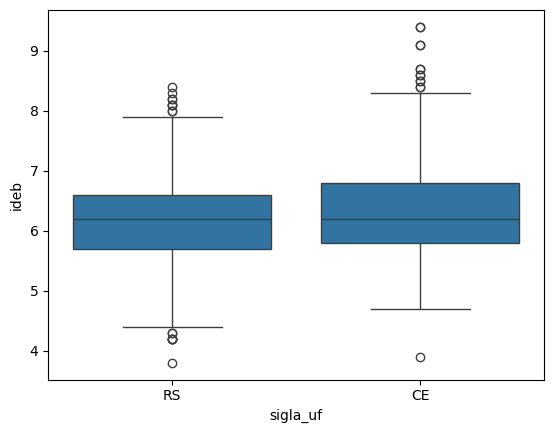

In [ ]:
import seaborn as sns

#Filtrando os dados dos dois estados RS e CE
df_RS = df_filter_2019[df_filter_2019['sigla_uf'] == 'RS']
df_CE = df_filter_2019[df_filter_2019['sigla_uf'] == 'CE']

#Agrupando os dados e plotando
df_final = pd.concat([df_RS, df_CE])
sns.boxplot(x=df_final['sigla_uf'], y=df_final['ideb']);

<Axes: xlabel='ideb', ylabel='Frequency'>

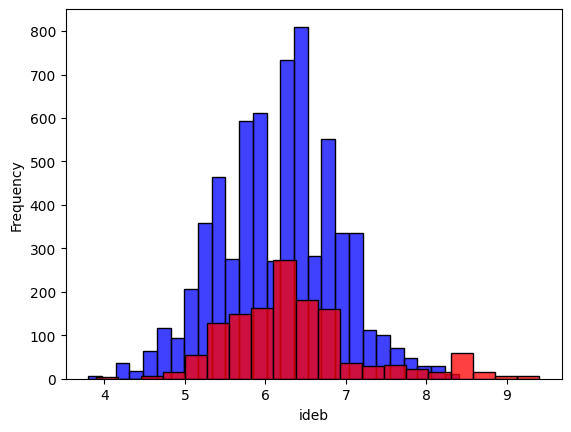

In [ ]:
#Plotando um histograma para ajudar na interpretação dos dados
sns.histplot(df_filter_2019[df_filter_2019['sigla_uf'] == 'RS']['ideb'], stat='frequency', color='blue', label='RS')
sns.histplot(df_filter_2019[df_filter_2019['sigla_uf'] == 'CE']['ideb'], stat='frequency', color='red', label='CE')

**Resposta:** No bloxpot aparece diferença da média entre os dois estados, mas não fica muito claro somente com análise visual. Com o histograma percebemos que RS possui uma maior simetria nos dados e a sua média parece ser maior que no CE. Fica claro então que está correto rejeitar a hipótese nula.

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

**Hipóteses:**

H0:Média do IDEB igual para os anos de 2005 e 2019.

Ha:Média do IDEB é diferente para os anos de 2005 e 2019.

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

# Suponha que você tenha um DataFrame chamado df com as colunas 'ano' e 'ideb'

# Criando dois DataFrames auxiliares para os anos de 2005 e 2019
df_2005 = df_filter[df_filter['ano'] == 2005]
df_2019 = df_filter[df_filter['ano'] == 2019]

# Selecionando as primeiras 300 linhas de cada DataFrame sem valores ausentes
df_2005_sample = df_2005.dropna().iloc[:300]
df_2019_sample = df_2019.dropna().iloc[:300]

# Selecionando apenas a coluna 'ideb' para o teste
ideb_2005 = df_2005_sample['ideb']
ideb_2019 = df_2019_sample['ideb']

# Realizando o teste de hipótese (teste t relacionado)
ttest_rel(ideb_2005, ideb_2019)

TtestResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295, df=299)

Resposta: Como o p-valor é menor que 0.05, podemos rejeitar a hipótese nula, isto é, podemos afirmar com 95% de confiança que a média do IDEB dos anos 2005 e 2019 não são iguais.


### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

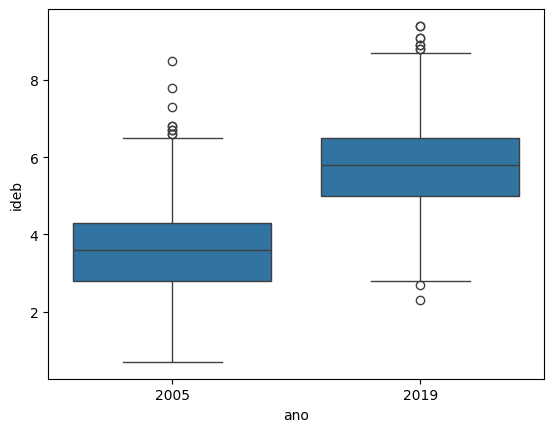

In [ ]:
df_final = pd.concat([df_2005, df_2019])
sns.boxplot(x=df_final['ano'], y=df_final['ideb']);

**Resposta:** No boxplot fica visualmente muito evidente a diferença de média do Ideb entre os anos 2005 e 2019.

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [ ]:
# Criando três DataFrames auxiliares para os estados da região Sul em 2019
df_PR_2019 = df[(df['sigla_uf'] == 'PR') & (df['ano'] == 2019)]
df_RS_2019 = df[(df['sigla_uf'] == 'RS') & (df['ano'] == 2019)]
df_SC_2019 = df[(df['sigla_uf'] == 'SC') & (df['ano'] == 2019)]

In [ ]:
# Removendo valores ausentes
df_PR_2019 = df_PR_2019.dropna()
df_RS_2019 = df_RS_2019.dropna()
df_SC_2019 = df_SC_2019.dropna()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Realizando o teste ANOVA para comparar as médias dos três estados
f_oneway(df_PR_2019['ideb'], df_RS_2019['ideb'], df_SC_2019['ideb'])

F_onewayResult(statistic=28.626795411241318, pvalue=5.050379312310251e-13)

Resposta: como o valor de p é menos que 0,05, podemos afirmar com 95% de confiança que a média dos 3 estados é diferente.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

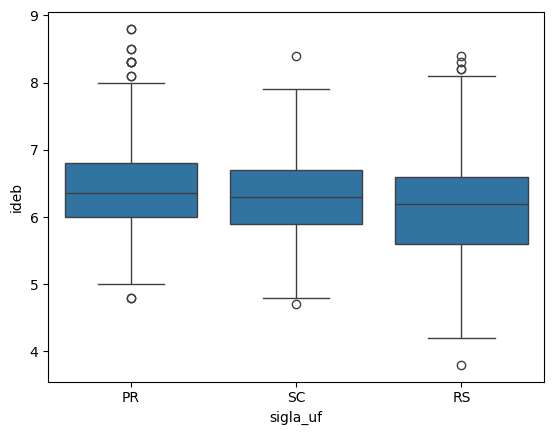

In [ ]:
df_final = pd.concat([df_PR_2019, df_SC_2019, df_RS_2019])

sns.boxplot(x=df_final['sigla_uf'], y=df_final['ideb']);

<Axes: xlabel='ideb', ylabel='Frequency'>

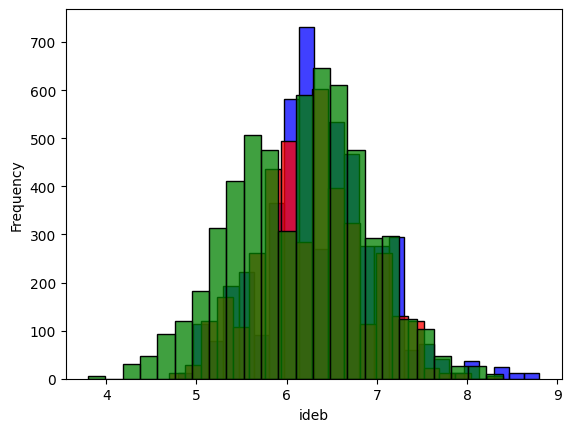

In [ ]:
#Plotando um histograma para ajudar na interpretação dos dados
sns.histplot(df_PR_2019['ideb'], stat='frequency', color='blue', label='PR')
sns.histplot(df_SC_2019['ideb'], stat='frequency', color='red', label='SC')
sns.histplot(df_RS_2019['ideb'], stat='frequency', color='green', label='RS')

**Resposta:** Analisando o bloxpot e o histograma percebemos que existe diferenças nos dados do IDEB entre os 3 estados. Percebemos que PR possuí valores mais altos e SC os valores mais baixos. Além disso PR e RS tem uma distribuição mais simétrica.

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_final['ideb'],
                  groups = df_final['sigla_uf'],
                  alpha = 0.05)
)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2336    0.0 -0.3064 -0.1608   True
    PR     SC  -0.1114 0.0039 -0.1929   -0.03   True
    RS     SC   0.1222 0.0005  0.0462  0.1982   True
----------------------------------------------------


**Resposta:** Observando o quadro acima podemos ver que os 3 estados apresentam diferença signicativa quando comparados. Isso pode ser observado na coluna reject, pois essa coluna diz se devemos ou não rejeitar a hipótese nula ( H0 : não há diferença entre os grupos).